# Predict Hospital Length of Stay (LOS) for Newborn 
* Admission Type = Newborn
* Healthcare Service Area = New York City

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
# For Modellimg
from sklearn.preprocessing import OneHotEncoder
# Using Chi2 , Information Gain
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
# For train / test split and data standardization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# Intall pycaret for model creation and compare for best classification
# ! pip install pycaret

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# Import Data from 2010 to 2017

In [7]:
df_2010=pd.read_csv(r"D:NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2010.csv")

In [8]:
df_2011=pd.read_csv(r"D:NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2011.csv")

In [9]:
df_2012=pd.read_csv(r"D:NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2012.csv")

In [10]:
df_2013=pd.read_csv(r"D:NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2013.csv")

In [11]:
df_2014=pd.read_csv(r"D:NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2014.csv")

In [12]:
df_2015=pd.read_csv(r"D:NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2015.csv")

In [13]:
df_2016=pd.read_csv(r"D:NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2016.csv")

In [14]:
df_2017=pd.read_csv(r"D:NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2017.csv")

In [15]:
# Checking imported Data for 7 years
df_2010.shape ,df_2011.shape ,df_2012.shape ,df_2013.shape ,df_2014.shape ,df_2015.shape ,df_2016.shape ,df_2017.shape

((2622133, 34),
 (2589121, 34),
 (2544543, 37),
 (2428905, 35),
 (2367550, 35),
 (2346931, 35),
 (2343429, 34),
 (2343569, 34))

In [16]:
# There is variation in column number
# checking columns difference
print('Columns for 2010: ',df_2010.columns)
print('Columns for 2011: ',df_2011.columns)
print('Columns for 2012: ',df_2012.columns)
print('Columns for 2013: ',df_2013.columns)
print('Columns for 2014: ',df_2014.columns)
print('Columns for 2015: ',df_2015.columns)
print('Columns for 2016: ',df_2016.columns)
print('Columns for 2017: ',df_2017.columns)

Columns for 2010:  Index(['Hospital.Service.Area', 'Hospital.County', 'Operating.Certificate.Number', 'Permanent.Facility.Id', 'Facility.Name', 'Age.Group', 'Zip.Code...3.digits', 'Gender', 'Race', 'Ethnicity', 'Length.of.Stay', 'Type.of.Admission', 'Patient.Disposition', 'Discharge.Year', 'CCS.Diagnosis.Code', 'CCS.Diagnosis.Description', 'CCS.Procedure.Code', 'CCS.Procedure.Description', 'APR.DRG.Code', 'APR.DRG.Description', 'APR.MDC.Code', 'APR.MDC.Description', 'APR.Severity.of.Illness.Code', 'APR.Severity.of.Illness.Description', 'APR.Risk.of.Mortality', 'APR.Medical.Surgical.Description', 'Payment.Typology.1', 'Payment.Typology.2', 'Payment.Typology.3', 'Birth.Weight', 'Abortion.Edit.Indicator', 'Emergency.Department.Indicator', 'Total.Charges', 'Total.Costs'], dtype='object')
Columns for 2011:  Index(['Health Service Area', 'Hospital County', 'Operating Certificate Number', 'Facility ID', 'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Lengt

In [17]:
# rename columns of Year 2010
df_2010.columns=df_2010.columns.str.replace('.',' ')

#### Yearly File Merge

In [18]:
# Merge Dataset for 7 years, considering 2017 as a latest format
# Merge only Newborn and New York City data
# Rename column names as per 2017 format

df_all=pd.concat([df_2017[(df_2017['Hospital Service Area']=='New York City') & (df_2017['Type of Admission']=='Newborn')],
                  df_2012[(df_2012['Health Service Area']=='New York City') & (df_2012['Type of Admission']=='Newborn')].rename(columns={'Health Service Area':'Hospital Service Area','Facility ID':'Permanent Facility Id'}),
                  df_2013[(df_2013['Hospital Service Area']=='New York City') & (df_2013['Type of Admission']=='Newborn')],
                  df_2014[(df_2014['Hospital Service Area']=='New York City') & (df_2014['Type of Admission']=='Newborn')],
                  df_2015[(df_2015['Hospital Service Area']=='New York City') & (df_2015['Type of Admission']=='Newborn')],
                  df_2016[(df_2016['Health Service Area']=='New York City') & (df_2016['Type of Admission']=='Newborn')].rename(columns={'Facility Id':'Permanent Facility Id','Health Service Area':'Hospital Service Area'}),
                  df_2011[(df_2011['Health Service Area']=='New York City') & (df_2011['Type of Admission']=='Newborn')].rename(columns={'Facility ID':'Permanent Facility Id','Health Service Area':'Hospital Service Area'}),
                  df_2010[(df_2010['Hospital Service Area']=='New York City') & (df_2010['Type of Admission']=='Newborn')].rename(columns={'Zip Code   3 digits':'Zip Code - 3 digits'})], ignore_index='True')

In [19]:
# Check All New born data
df_all.shape , df_all.columns

((944300, 38),
 Index(['Hospital Service Area', 'Hospital County', 'Operating Certificate Number', 'Permanent Facility Id', 'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Type of Admission', 'Patient Disposition', 'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description', 'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3', 'Birth Weight', 'Abortion Edit Indicator', 'Emergency Department Indicator', 'Total Charges', 'Total Costs', 'Attending Provider License Number', 'Operating Provider License Number', 'Other Provider License Number', 'Ratio of Total Costs to Total Charges'], dtype='object'))

In [20]:
# Newborn 2017 dataset
df_newborn_2017=df_2017[(df_2017['Hospital Service Area']=='New York City') & (df_2017['Type of Admission']=='Newborn')]

In [21]:
# newborn 2017 data
df_newborn_2017.shape

(112492, 34)

In [22]:
# Check null values
df_all.isna().sum()

Hospital Service Area                         0
Hospital County                               0
Operating Certificate Number                  0
Permanent Facility Id                         0
Facility Name                                 0
Age Group                                     0
Zip Code - 3 digits                        8490
Gender                                        0
Race                                          0
Ethnicity                                     0
Length of Stay                                0
Type of Admission                             0
Patient Disposition                           0
Discharge Year                                0
CCS Diagnosis Code                            1
CCS Diagnosis Description                     1
CCS Procedure Code                            1
CCS Procedure Description                     1
APR DRG Code                                  0
APR DRG Description                           0
APR MDC Code                            

In [23]:
# Hospital County
df_all['Hospital County'].value_counts()

Manhattan    350733
Kings        235258
Queens       192377
Bronx        121183
Richmond      44749
Name: Hospital County, dtype: int64

In [24]:
# No. of Hospital County
len(df_all['Permanent Facility Id'].unique())

47

In [25]:
# No. of Hospital County
len(df_all['Facility Name'].value_counts().unique())

64

In [26]:
# There seems issue of multiple  description for single code as Facility ID is 47 where as there are 64 unique names

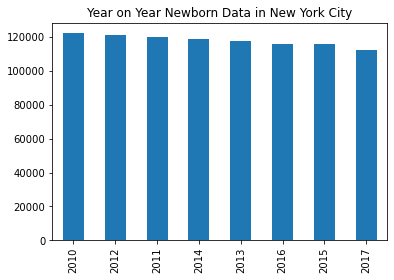

In [27]:
# Checking Years data if merged properly
df_all['Discharge Year'].value_counts().plot.bar()
plt.title("Year on Year Newborn Data in New York City")
plt.show()

#### Year on Year Newborns are in reducing trend. More will be checked during Data Cleanup

# Data Preprocessing & Cleanup

In [28]:
# dropping highly null columns and not available in latest year data
df_all.drop(columns=['Attending Provider License Number','Operating Provider License Number','Other Provider License Number',
                        'Ratio of Total Costs to Total Charges'],inplace=True)

In [29]:
# Total Columns available
df_all.shape , df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944300 entries, 0 to 944299
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Hospital Service Area                944300 non-null  object 
 1   Hospital County                      944300 non-null  object 
 2   Operating Certificate Number         944300 non-null  float64
 3   Permanent Facility Id                944300 non-null  float64
 4   Facility Name                        944300 non-null  object 
 5   Age Group                            944300 non-null  object 
 6   Zip Code - 3 digits                  935810 non-null  object 
 7   Gender                               944300 non-null  object 
 8   Race                                 944300 non-null  object 
 9   Ethnicity                            944300 non-null  object 
 10  Length of Stay                       944300 non-null  object 
 11  Type of Admis

((944300, 34), None)

In [31]:
# Checking Code and Description , if multiple descriptions for same code
df_all.groupby(['Permanent Facility Id'])['Facility Name'].nunique().sort_values(ascending=False)

Permanent Facility Id
1637.0    5
1304.0    3
1306.0    3
1466.0    3
1437.0    2
1168.0    2
3376.0    2
1638.0    2
1176.0    2
1463.0    2
1439.0    2
3975.0    1
1320.0    1
1318.0    1
1305.0    1
1294.0    1
1302.0    1
1301.0    1
1288.0    1
1286.0    1
1186.0    1
1178.0    1
1172.0    1
1169.0    1
1165.0    1
1438.0    1
1450.0    1
1445.0    1
1446.0    1
3058.0    1
1740.0    1
1738.0    1
1692.0    1
1635.0    1
1633.0    1
1630.0    1
1629.0    1
1628.0    1
1626.0    1
1473.0    1
1471.0    1
1469.0    1
1464.0    1
1458.0    1
1456.0    1
1454.0    1
1164.0    1
Name: Facility Name, dtype: int64

In [32]:
# getting Code and Descriptions of all available fields.
# There can be similar issue of code and description differences
facility=df_all.groupby(['Permanent Facility Id'])['Facility Name'].unique().apply(list).to_dict()
diag=df_all.groupby(['CCS Diagnosis Code'])['CCS Diagnosis Description'].unique().apply(list).to_dict()
drg=df_all.groupby(['APR DRG Code'])['APR DRG Description'].unique().apply(list).to_dict()
proc=df_all.groupby(['CCS Procedure Code'])['CCS Procedure Description'].unique().apply(list).to_dict()
ill=df_all.groupby(['APR Severity of Illness Code'])['APR Severity of Illness Description'].unique().apply(list).to_dict()

In [33]:
# Checking facility Code and Desc
facility

{1164.0: ['Bronx-Lebanon Hospital Center - Fulton Division'],
 1165.0: ['Jacobi Medical Center'],
 1168.0: ['Montefiore Medical Center-Wakefield Hospital',
  'Montefiore Medical Center - North Division'],
 1169.0: ['Montefiore Medical Center - Henry & Lucy Moses Div'],
 1172.0: ['Lincoln Medical & Mental Health Center'],
 1176.0: ['SBH Health System', 'St Barnabas Hospital'],
 1178.0: ['Bronx-Lebanon Hospital Center - Concourse Division'],
 1186.0: ['North Central Bronx Hospital'],
 1286.0: ['Brookdale Hospital Medical Center'],
 1288.0: ['Brooklyn Hospital Center - Downtown Campus'],
 1294.0: ['Coney Island Hospital'],
 1301.0: ['Kings County Hospital Center'],
 1302.0: ['SUNY Downstate Medical Center at LICH'],
 1304.0: ['NYU Langone Hospital-Brooklyn',
  'NYU Lutheran Medical Center',
  'Lutheran Medical Center'],
 1305.0: ['Maimonides Medical Center'],
 1306.0: ['New York - Presbyterian Brooklyn Methodist Hospital',
  'New York Methodist Hospital',
  'NewYork-Presbyterian Brooklyn 

In [34]:
ill

{0: [nan], 1: ['Minor'], 2: ['Moderate'], 3: ['Major'], 4: ['Extreme']}

In [35]:
# Making NAN values as NA for Code 0
ill[0]='NA'

In [36]:
# Doing Data Sync Code and Description based on Master Set Created 
# Get first Value for a code
df_all['Facility Name']= df_all['Permanent Facility Id'].apply(lambda x: facility[x][0])
df_all['CCS Diagnosis Description']= df_all['CCS Diagnosis Code'].apply(lambda x: diag[x][0])
df_all['APR DRG Description']= df_all['APR DRG Code'].apply(lambda x: drg[x][0])
df_all['CCS Procedure Description']= df_all['CCS Procedure Code'].apply(lambda x: proc[x][0])
df_all['APR Severity of Illness Description']= df_all['APR Severity of Illness Code'].apply(lambda x: ill[x][0])

In [37]:
df_all.isna().sum()

Hospital Service Area                       0
Hospital County                             0
Operating Certificate Number                0
Permanent Facility Id                       0
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                      8490
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         0
Discharge Year                              0
CCS Diagnosis Code                          0
CCS Diagnosis Description                   0
CCS Procedure Code                          0
CCS Procedure Description                   0
APR DRG Code                                0
APR DRG Description                         0
APR MDC Code                                0
APR MDC Description               

In [38]:
# Handling Null Values, imputing NA
df_all['Zip Code - 3 digits']=df_all['Zip Code - 3 digits'].fillna('NA')

In [39]:
# Handling Null Values
df_all['APR Risk of Mortality']=df_all['APR Risk of Mortality'].fillna('NA')

In [40]:
# Checking birth weight values
df_all['Birth Weight'].value_counts()

3200.0    79431
3300.0    77151
3100.0    75119
3400.0    73140
3000.0    67966
3500.0    64548
2900.0    57357
3600.0    56229
2800.0    47071
3700.0    45651
2700.0    35888
3800.0    35401
2600.0    27667
3900.0    26836
2500.0    20410
4000.0    19134
2400.0    15398
4100.0    13739
2300.0    11634
4200.0     9378
2200.0     9089
2100.0     7016
4300.0     6356
2000.0     5616
1900.0     4269
4400.0     4177
1800.0     3661
1700.0     2999
4500.0     2712
1600.0     2433
1500.0     2026
1400.0     1819
4600.0     1670
1300.0     1573
03200      1394
03300      1369
1200.0     1337
03100      1319
1100.0     1285
03400      1240
1000.0     1206
03000      1176
4700.0     1138
03500      1076
02900      1063
03600       972
02800       887
0           873
03700       746
4800.0      732
900.0       691
800.0       663
600.0       639
02700       639
700.0       621
03800       572
500.0       485
4900.0      463
02600       460
03900       440
02500       341
04000       320
5000.0  

In [41]:
# Replacing UNKN with 0 and NAN with 0
df_all['Birth Weight']=df_all['Birth Weight'].apply(lambda x:0 if x=='UNKN' else x)
df_all['Birth Weight']=df_all['Birth Weight'].fillna('0')

In [42]:
# Checking birth weight values
df_all['Birth Weight'].value_counts()

3200.0    79431
3300.0    77151
3100.0    75119
3400.0    73140
3000.0    67966
3500.0    64548
2900.0    57357
3600.0    56229
2800.0    47071
3700.0    45651
2700.0    35888
3800.0    35401
2600.0    27667
3900.0    26836
2500.0    20410
4000.0    19134
2400.0    15398
4100.0    13739
2300.0    11634
4200.0     9378
2200.0     9089
2100.0     7016
4300.0     6356
2000.0     5616
1900.0     4269
4400.0     4177
1800.0     3661
1700.0     2999
4500.0     2712
1600.0     2433
1500.0     2026
1400.0     1819
4600.0     1670
1300.0     1573
03200      1394
03300      1369
1200.0     1337
03100      1319
1100.0     1285
03400      1240
1000.0     1206
03000      1176
4700.0     1138
03500      1076
02900      1063
03600       972
02800       887
0           887
03700       746
4800.0      732
900.0       691
800.0       663
600.0       639
02700       639
700.0       621
03800       572
500.0       485
4900.0      463
02600       460
03900       440
02500       341
04000       320
5000.0  

In [43]:
# Converting birth weight 
df_all['Birth Weight']=df_all['Birth Weight'].astype('int64')

In [44]:
# Data type conversion , also for values 120+ marking as 120
df_all['Length of Stay']=df_all['Length of Stay'].apply(lambda x: 120 if x=='120 +' else x)
df_all['Length of Stay']=df_all["Length of Stay"].astype("int64")

In [45]:
# Converting  cost and charges to Float
df_all['Total Charges']=df_all['Total Charges'].apply(lambda x: str.replace(x,',','') if str(x).find(',') > 0 else x ).astype("float64")
df_all['Total Costs']=df_all['Total Costs'].apply(lambda x: str.replace(x,',','') if str(x).find(',') > 0 else x ).astype("float64")

In [46]:
df_all.shape

(944299, 34)

In [47]:
# Duplicate drop
df_all=df_all.drop_duplicates()

In [48]:
df_all.shape

(888601, 34)

In [49]:
# last check for NUll %
df_all.isna().sum()

Hospital Service Area                       0
Hospital County                             0
Operating Certificate Number                0
Permanent Facility Id                       0
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                         0
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         0
Discharge Year                              0
CCS Diagnosis Code                          0
CCS Diagnosis Description                   0
CCS Procedure Code                          0
CCS Procedure Description                   0
APR DRG Code                                0
APR DRG Description                         0
APR MDC Code                                0
APR MDC Description               

In [50]:
# Dropping Payment Typology 2 & 3 , already Typology 1 available
df_all.drop(['Payment Typology 2','Payment Typology 3'],axis=1,inplace=True)

In [51]:
df_all.shape, df_all.columns

((888601, 32),
 Index(['Hospital Service Area', 'Hospital County', 'Operating Certificate Number', 'Permanent Facility Id', 'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Type of Admission', 'Patient Disposition', 'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description', 'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Birth Weight', 'Abortion Edit Indicator', 'Emergency Department Indicator', 'Total Charges', 'Total Costs'], dtype='object'))

In [52]:
# Code Columns not needed, retaining only categorical variables having description
df_all.drop(['Permanent Facility Id','CCS Diagnosis Code','CCS Procedure Code'
            ,'APR Severity of Illness Code','APR DRG Code','APR MDC Code'],axis=1,inplace=True)

In [53]:
# drop columns not required for analysis
df_all.drop(['Hospital Service Area','Type of Admission','Operating Certificate Number'],axis=1,inplace=True)

In [54]:
df_all.shape, df_all.columns

((888601, 23),
 Index(['Hospital County', 'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Patient Disposition', 'Discharge Year', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Birth Weight', 'Abortion Edit Indicator', 'Emergency Department Indicator', 'Total Charges', 'Total Costs'], dtype='object'))

In [55]:
# Final check for Duplicate data after column drop
df_all=df_all.drop_duplicates()

In [56]:
df_all.shape, df_all.columns

((880927, 23),
 Index(['Hospital County', 'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Patient Disposition', 'Discharge Year', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Birth Weight', 'Abortion Edit Indicator', 'Emergency Department Indicator', 'Total Charges', 'Total Costs'], dtype='object'))

#### Overall steps performed in cleanup
* Import 8 Years files
* Filter data based on "Type of Admission" and "Health Facility Area"
* 8 years file are merged, renaming columns as per 2017 format
* Validate Code and Description discrepency. 
* Missing value imputation using NA for categorical values , 0 for numerical
* Data Type Conversions
* Duplicate Data Drop and columns

In [57]:
# Dump Data in CSV File for Quick EDA in MicroStrategy Workstation
df_all.to_csv("D:Sparcs_2010_2017_Newborn.csv")

# EDA

In [58]:
# dataset numerical field assessment
df_all.describe()

,Length of Stay,Discharge Year,Birth Weight,Total Charges,Total Costs
count,880927.000000,880927.000000,880927.000000,8.809270e+05,8.809270e+05
mean,3.969817,2013.482309,3192.065290,2.297303e+04,6.999303e+03
std,8.501018,2.285491,631.071767,1.013999e+05,3.113306e+04
min,1.000000,2010.000000,0.000000,3.084000e+01,5.970000e+00
25%,2.000000,2011.000000,2900.000000,4.571980e+03,1.096955e+03
50%,2.000000,2013.000000,3200.000000,7.473000e+03,1.873120e+03
75%,3.000000,2015.000000,3500.000000,1.219500e+04,3.628300e+03
max,120.000000,2017.000000,9900.000000,7.248391e+06,2.483084e+06


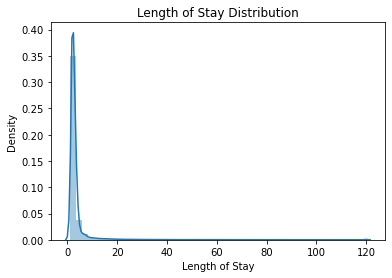

In [59]:
# LOS Data Distribution
sns.distplot(df_all['Length of Stay'])
plt.title("Length of Stay Distribution")
plt.show()

### Length of Stay is highly skewed

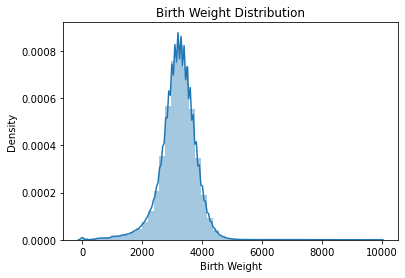

In [60]:
sns.distplot(df_all['Birth Weight'])
plt.title("Birth Weight Distribution")
plt.show()

#### Birthweight is highly concenrated between 2000 to 4000 Gms

### Univariate Analysis

In [61]:
# Checking distinct value of each column
df_all.nunique()

Hospital County                             5
Facility Name                              47
Age Group                                   5
Zip Code - 3 digits                        82
Gender                                      3
Race                                        5
Ethnicity                                   4
Length of Stay                            120
Patient Disposition                        19
Discharge Year                              8
CCS Diagnosis Description                 155
CCS Procedure Description                 183
APR DRG Description                       208
APR MDC Description                        25
APR Severity of Illness Description         5
APR Risk of Mortality                       5
APR Medical Surgical Description            3
Payment Typology 1                         15
Birth Weight                              100
Abortion Edit Indicator                     1
Emergency Department Indicator              2
Total Charges                     

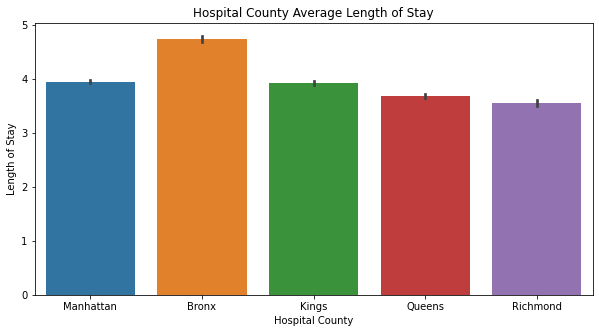

In [62]:
# County Wise Length of Stay and Patients
plt.figure(figsize=[10,5])
sns.barplot(data=df_all, x='Hospital County',y='Length of Stay')
plt.title("Hospital County Average Length of Stay")
plt.show()

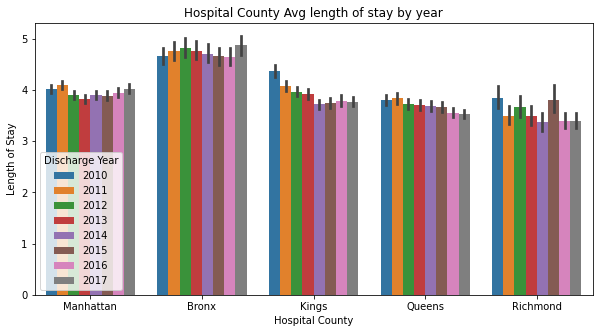

In [63]:
# County Wise Length of Stay and Patients
plt.figure(figsize=[10,5])
sns.barplot(data=df_all, x='Hospital County',y='Length of Stay',hue='Discharge Year')
plt.title("Hospital County Avg length of stay by year")
plt.show()

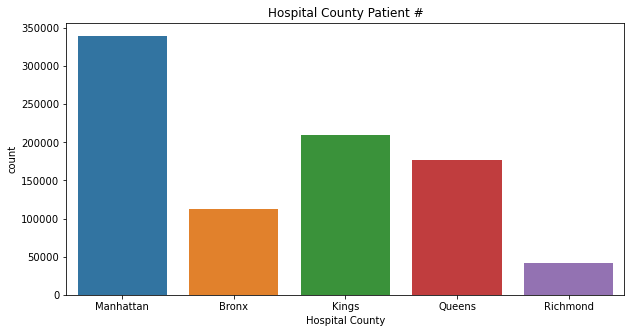

In [64]:
# County Wise Length of Stay and Patients
plt.figure(figsize=[10,5])
sns.countplot(data=df_all, x='Hospital County')
plt.title("Hospital County Patient #")
plt.show()

*  Maximum number of discharge are in Manhattan
* Bronx has second lowest discharges but has the highest average length of stay
* Most of the county has reduced average length of stay except Bronx has increase trends in LOS

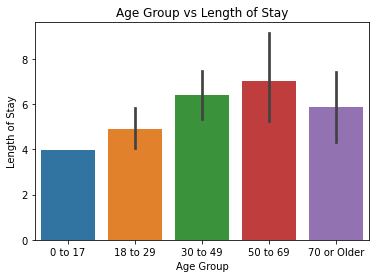

In [65]:
sns.barplot(data=df_all, x='Age Group',y='Length of Stay')
plt.title("Age Group vs Length of Stay")
plt.show()

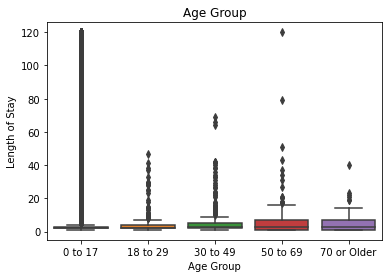

In [66]:
sns.boxplot(data=df_all,x='Age Group',y='Length of Stay')
plt.title("Age Group")
plt.show()

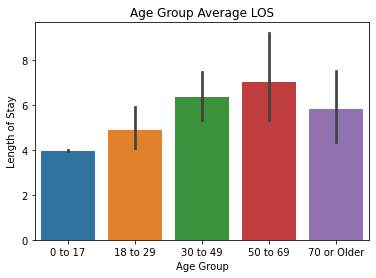

In [67]:
sns.barplot(data=df_all,x='Age Group',y='Length of Stay')
plt.title("Age Group Average LOS")
plt.show()

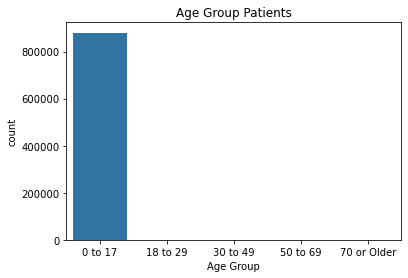

In [68]:
sns.countplot(data=df_all,x='Age Group')
plt.title("Age Group Patients")
plt.show()

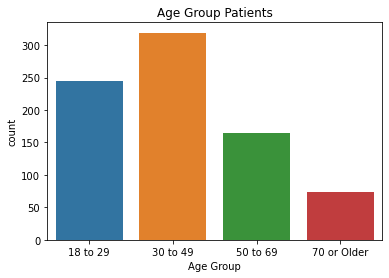

In [69]:
sns.countplot(data=df_all[df_all['Age Group']!='0 to 17'],x='Age Group')
plt.title("Age Group Patients")
plt.show()

In [70]:
# Generally new born age group should be between 0-17 , Checking what all DRG are there in other age groups
df_all.groupby(['Age Group','APR DRG Description'])['Hospital County'].count()

Age Group    APR DRG Description                                                                      
0 to 17      Acute anxiety & delirium states                                                                   1
             Adjustment disorders & neuroses except depressive diagnoses                                       1
             Asthma                                                                                            1
             BPD & oth chronic respiratory diseases arising in perinatal period                               13
             Behavioral disorders                                                                              8
             Bipolar disorders                                                                                10
             Bronchiolitis & RSV pneumonia                                                                     6
             CHEMOTHERAPY                                                                                 

* Maximum patients are in 0-17 category with high Length of Stay
* Other Age Groups have very less patients
* Based on DRG Description, maximum patients are Neonate bwt > 2499g 

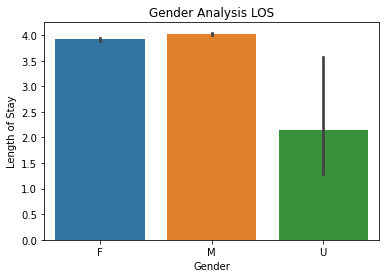

In [71]:
sns.barplot(data=df_all,x='Gender',y='Length of Stay')
plt.title("Gender Analysis LOS")
plt.show()

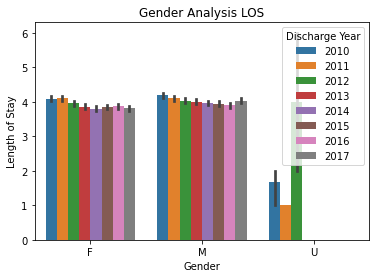

In [72]:
sns.barplot(data=df_all,x='Gender',y='Length of Stay',hue='Discharge Year')
plt.title("Gender Analysis LOS")
plt.show()

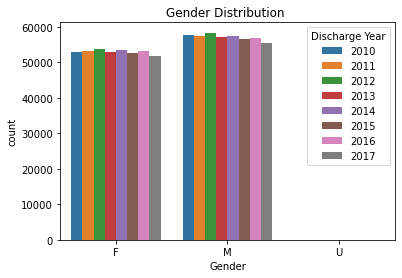

In [73]:
sns.countplot(data=df_all,x='Gender',hue='Discharge Year')
plt.title("Gender Distribution ")
plt.show()

* Male patients are higher and also have higher average length of stay
* Year on Year Male patients are highest in 2012 and lowest in 2017

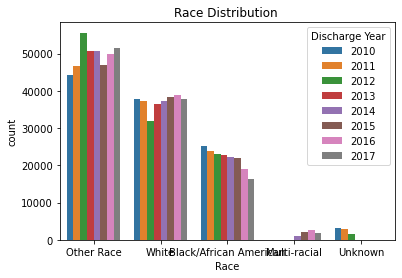

In [74]:
sns.countplot(data=df_all,x='Race',hue='Discharge Year')
plt.title("Race Distribution ")
plt.show()

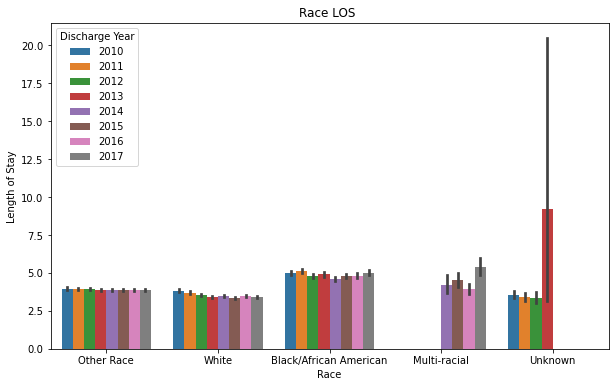

In [75]:
plt.figure(figsize=[10,6])
sns.barplot(data=df_all,x='Race',y='Length of Stay',hue='Discharge Year')
plt.title("Race LOS ")
plt.show()

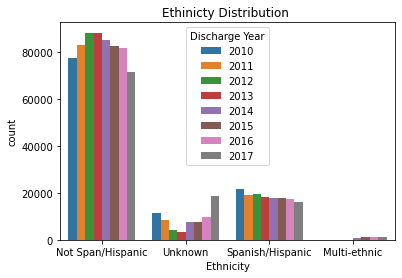

In [76]:
sns.countplot(data=df_all,x='Ethnicity',hue='Discharge Year')
plt.title("Ethinicty Distribution ")
plt.show()

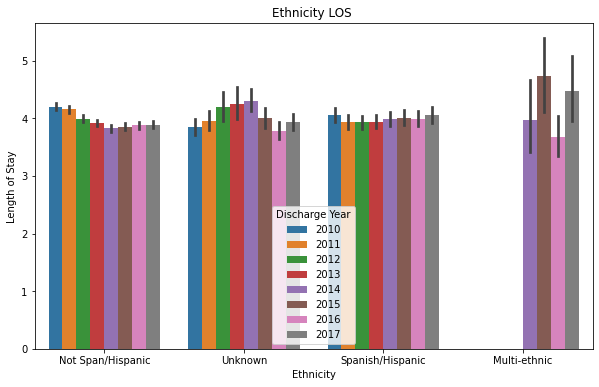

In [77]:
plt.figure(figsize=[10,6])
sns.barplot(data=df_all,x='Ethnicity',y='Length of Stay',hue='Discharge Year')
plt.title("Ethnicity LOS ")

plt.show()

* Other Race has the highest patients through years as well have highest in 2012
* Non Span/Hispanic Ethinicity has highest patients and their year of year Length of Stay is consistent
* Unknown Race has the highest LOS in 2013

Text(0.5, 1.0, 'APR Risk of Mortality LOS ')

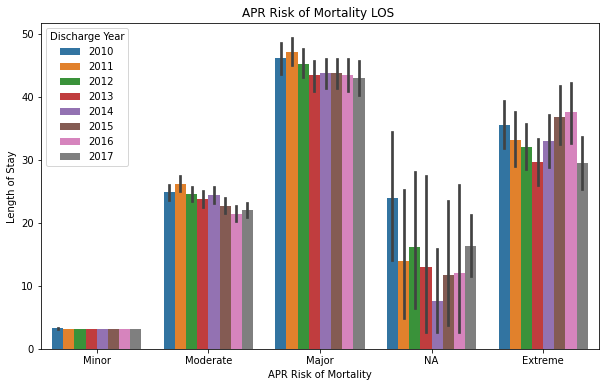

In [78]:
plt.figure(figsize=[10,6])
sns.barplot(data=df_all,x='APR Risk of Mortality',y='Length of Stay',hue='Discharge Year')
plt.title("APR Risk of Mortality LOS ")


Text(0.5, 1.0, 'APR Risk of Mortality Distribution')

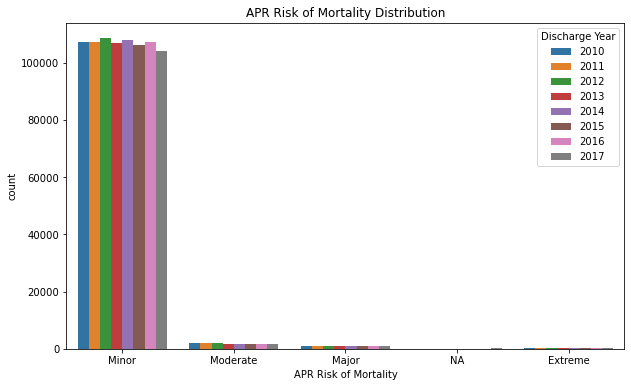

In [79]:
plt.figure(figsize=[10,6])
sns.countplot(data=df_all,x='APR Risk of Mortality',hue='Discharge Year')
plt.title("APR Risk of Mortality Distribution")

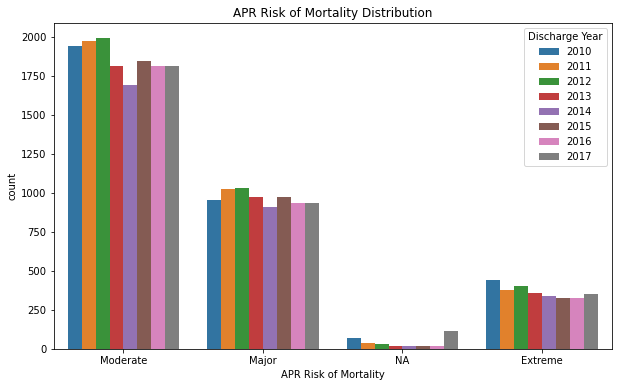

In [80]:
plt.figure(figsize=[10,6])
sns.countplot(data=df_all[df_all['APR Risk of Mortality']!='Minor']
              ,x='APR Risk of Mortality',hue='Discharge Year')
plt.title("APR Risk of Mortality Distribution")
plt.show()

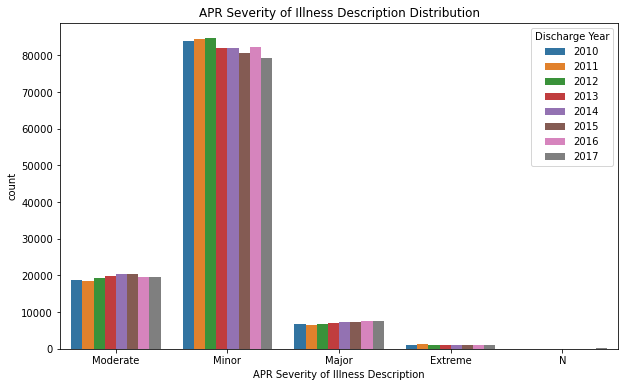

In [81]:
plt.figure(figsize=[10,6])
sns.countplot(data=df_all
              ,x='APR Severity of Illness Description',hue='Discharge Year')
plt.title("APR Severity of Illness Description Distribution")
plt.show()

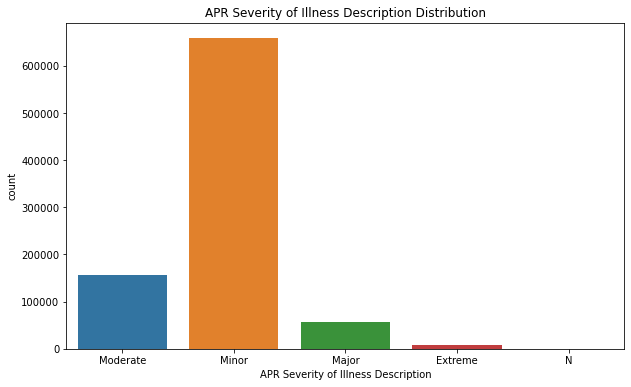

In [82]:
plt.figure(figsize=[10,6])
sns.countplot(data=df_all
              ,x='APR Severity of Illness Description')
plt.title("APR Severity of Illness Description Distribution")
plt.show()

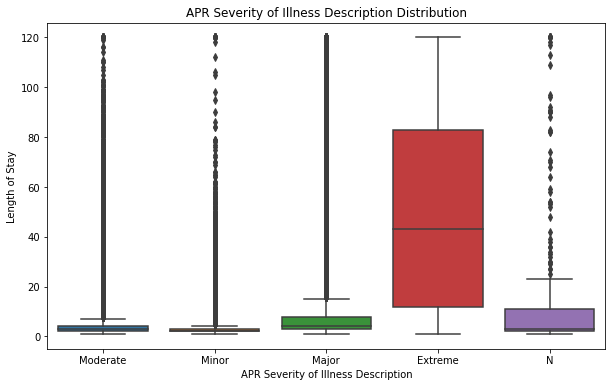

In [83]:
plt.figure(figsize=[10,6])
sns.boxplot(data=df_all
              ,x='APR Severity of Illness Description',y='Length of Stay')
plt.title("APR Severity of Illness Description Distribution")
plt.show()

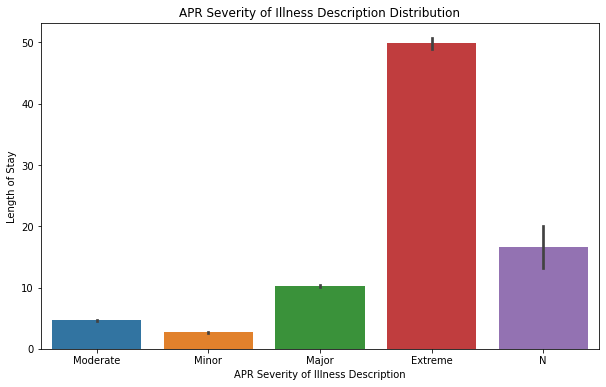

In [84]:
plt.figure(figsize=[10,6])
sns.barplot(data=df_all
              ,x='APR Severity of Illness Description',y='Length of Stay')
plt.title("APR Severity of Illness Description Distribution")
plt.show()

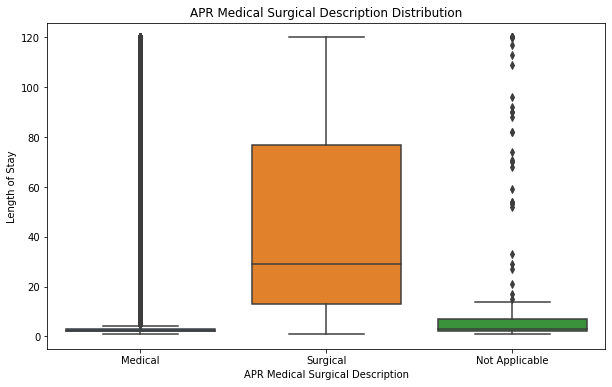

In [85]:
plt.figure(figsize=[10,6])
sns.boxplot(data=df_all
              ,x='APR Medical Surgical Description',y='Length of Stay')
plt.title("APR Medical Surgical Description Distribution")
plt.show()


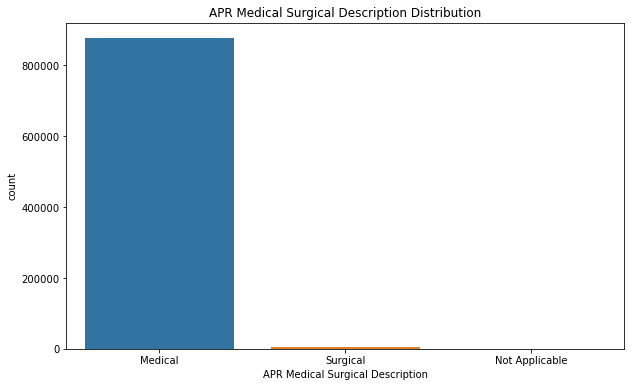

In [86]:
plt.figure(figsize=[10,6])
sns.countplot(data=df_all
              ,x='APR Medical Surgical Description')
plt.title("APR Medical Surgical Description Distribution")
plt.show()

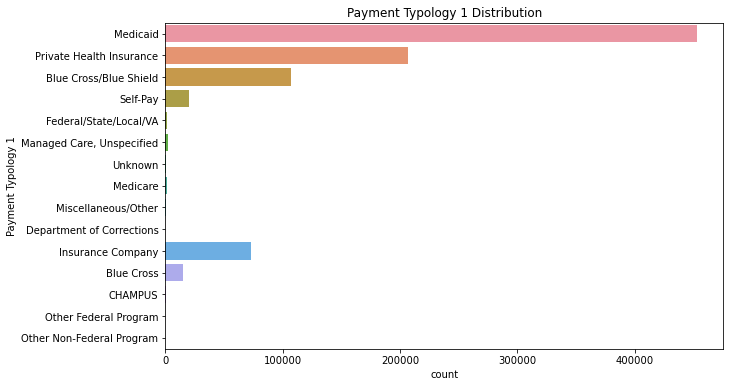

In [87]:

plt.figure(figsize=[10,6])
sns.countplot(data=df_all
              ,y='Payment Typology 1')
plt.title("Payment Typology 1 Distribution")
plt.show()


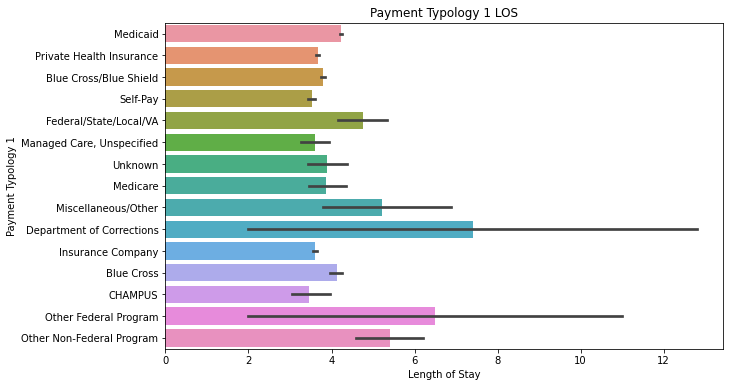

In [88]:
plt.figure(figsize=[10,6])
sns.barplot(data=df_all
              ,y='Payment Typology 1',x='Length of Stay')
plt.title("Payment Typology 1 LOS")
plt.show()

# Bivariate and Multivariate Analysis

In [89]:
df_all.corr()

,Length of Stay,Discharge Year,Birth Weight,Total Charges,Total Costs
Length of Stay,1.000000,-0.009310,-0.238899,0.854035,0.868443
Discharge Year,-0.009310,1.000000,-0.023599,0.045104,0.024594
Birth Weight,-0.238899,-0.023599,1.000000,-0.219038,-0.208428
Total Charges,0.854035,0.045104,-0.219038,1.000000,0.897003
Total Costs,0.868443,0.024594,-0.208428,0.897003,1.000000


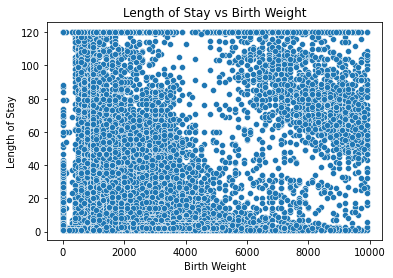

In [90]:
sns.scatterplot(data=df_all,x="Birth Weight",y='Length of Stay')
plt.title("Length of Stay vs Birth Weight")
plt.show()

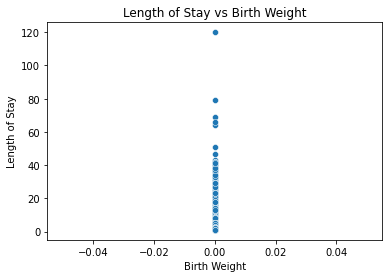

In [91]:
sns.scatterplot(data=df_all[df_all['Age Group']!='0 to 17'],x="Birth Weight",y='Length of Stay')
plt.title("Length of Stay vs Birth Weight")
plt.show()

#### * Birth Weight  is having -ve correlation with Age Group , also age group other than 0-17 has 0 birth weight , so for newborn analysis and model , Age Group 0 - 17 will be considered 

#### * Total Charges and Total Cost is highly correlated with LOS

# Year on Year Analysis of Diagnosis for Age Group 0-17 

In [92]:
# creating new dataframe for agegroup 0 to 17
df_all_age=df_all[df_all['Age Group']=='0 to 17']

In [93]:
# Looking at Major Diagnostic Category
df_all_age.groupby(['APR MDC Description'])['Length of Stay'].agg(['count','min','max','mean']).sort_values(by='count',ascending=False)

,count,min,max,mean
APR MDC Description,,,,
Newborns and Other Neonates with Conditions Originating in the Perinatal Period,879684,1,120,3.959631
Pre-MDC or Ungroupable,213,1,120,22.075117
Diseases and Disorders of the Respiratory System,48,1,98,30.125000
"Rehabilitation, Aftercare, Other Factors Influencing Health Status and Other Health Service Contacts",37,1,120,38.405405
Mental Diseases and Disorders,26,1,35,8.000000
Diseases and Disorders of the Circulatory System,21,1,70,16.000000
Diseases and Disorders of the Digestive System,16,1,120,11.625000
"Infectious and Parasitic Diseases, Systemic or Unspecified Sites",16,2,62,18.562500
"Diseases and Disorders of Blood, Blood Forming Organs and Immunological Disorders",13,1,88,13.000000


In [94]:
# DRG Analysis
df_all_age.groupby(['APR DRG Description'])['Length of Stay'].agg(['count','min','max','mean']).sort_values(by='count',ascending=False)

,count,min,max,mean
APR DRG Description,,,,
"Neonate birthwt >2499g, normal newborn or neonate w other problem",745414,1,79,2.485467
"Neonate bwt 2000-2499g, normal newborn or neonate w other problem",37283,1,61,3.988359
Neonate birthwt >2499g w other significant condition,20469,1,94,4.657433
Neonate birthwt >2499g w major anomaly,15005,1,120,5.446118
"Neonate, birthwt >2499g w resp dist synd/oth maj resp cond",8949,1,120,6.777070
Neonate bwt 1500-1999g w or w/o other significant condition,8587,1,120,13.796087
Neonate birthwt >2499g w congenital/perinatal infection,8231,1,68,6.621188
Neonate bwt 2000-2499g w other significant condition,4130,1,84,9.615012
Neonate bwt 1500-1999g w resp dist synd/oth maj resp cond,3868,1,120,25.480869


In [95]:
df_all_age.groupby(['CCS Diagnosis Description'])['Length of Stay'].agg(['count','min','max','mean']).sort_values(by='count',ascending=False)

,count,min,max,mean
CCS Diagnosis Description,,,,
Liveborn,878550,1,120,3.952366
Other perinatal conditions,440,1,120,9.686364
Hemolytic jaundice and perinatal jaundice,422,1,59,2.137441
Short gestation; low birth weight; and fetal growth retardation,197,1,120,29.720812
Cardiac and circulatory congenital anomalies,94,1,120,19.287234
Respiratory distress syndrome,64,1,120,39.062500
Septicemia (except in labor),44,2,120,17.590909
Other congenital anomalies,41,1,67,13.390244
Medical examination/evaluation,31,1,14,4.322581


In [96]:
df_all_age.groupby(['CCS Procedure Description'])['Length of Stay'].agg(['count','min','max','mean']).sort_values(by='count',ascending=False)

,count,min,max,mean
CCS Procedure Description,,,,
PROPHYLACTIC VAC/INOCUL,319854,1,120,2.794344
OPHTHALM-/OT-OLOGIC DX,271336,1,120,2.684395
CIRCUMCISION,115658,1,120,2.884193
NO PROC,73336,1,120,2.429816
RESP INTUB/MECH VENTIL,41096,1,120,18.130791
OTHER THERAPEUTIC PRCS,34541,1,120,6.110651
ENTERAL/PARENTERAL NUTR,4286,1,120,17.456603
OTHER RESP THERAPY,2036,1,120,8.552063
OT VASC CATH; NOT HEART,1967,1,120,28.445857


####  Looks like even in age group 0-17 maximum records are for Liveborn others are very few
#### Looking at data based on "Newborns and Other Neonates with Conditions Originating in the Perinatal Period"

In [97]:
df_mdc=df_all_age[df_all_age['APR MDC Description']=='Newborns and Other Neonates with Conditions Originating in the Perinatal Period'] 

In [98]:
# Looking at MDC 15 data set for diagnosis
df_mdc.groupby(['CCS Diagnosis Description'])['Length of Stay'].agg(['count','min','max','mean']).sort_values(by='count',ascending=False)

,count,min,max,mean
CCS Diagnosis Description,,,,
Liveborn,878340,1,120,3.948206
Hemolytic jaundice and perinatal jaundice,411,1,59,2.150852
Other perinatal conditions,400,1,120,7.780000
Short gestation; low birth weight; and fetal growth retardation,163,1,120,27.582822
Cardiac and circulatory congenital anomalies,74,1,120,19.959459
Respiratory distress syndrome,54,1,120,38.629630
Other congenital anomalies,40,1,67,13.650000
Septicemia (except in labor),36,2,120,15.888889
Medical examination/evaluation,30,1,14,4.200000


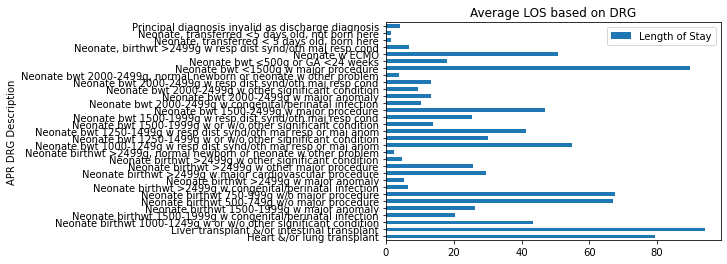

In [99]:
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],aggfunc='mean').plot.barh()
plt.title("Average LOS based on DRG")
plt.show()

In [100]:
# Maximum data set is of liveborn between agegroup 0-17 , so checking Liveborn Procedures
df_mdc[df_mdc['CCS Diagnosis Description']=='Liveborn'].groupby(['CCS Procedure Description'])['Length of Stay'].agg(['min','max','mean','count']).sort_values(by='mean',ascending=False)

,min,max,mean,count
CCS Procedure Description,,,,
DES LES RETINA/CHOROID,81,120,103.400000,5
LENS & CATARACT PRCS,101,101,101.000000,1
TRACHEOSTOMY; TEMP/PERM,1,120,97.754902,102
REPAIR RETINAL TEAR,70,120,94.000000,4
ARTERIO/VENOGRAM-NOT HH,92,92,92.000000,1
OT ORGAN TRANSPLANTATN,50,120,84.166667,6
BIOPSY OF LIVER,82,82,82.000000,1
ILEO- & OT ENTER-OSTOMY,15,120,78.454545,33
OT OR PRCS VES NOT HEAD,2,120,75.298780,492


In [101]:
# Year on Year Length of Stay per DRG
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],columns=['Discharge Year'],aggfunc='mean')


Length of Stay                                                                               
Discharge Year                                               2010       2011       2012       2013        2014        2015       2016       2017
APR DRG Description                                                                                                                             
Heart &/or lung transplant                                    NaN  59.000000        NaN        NaN  120.000000         NaN  50.000000  88.000000
Liver transplant &/or intestinal transplant                   NaN        NaN        NaN        NaN         NaN  107.000000        NaN  81.000000
Neonate birthwt 1000-1249g w or w/o other signi...      43.210526  44.758065  43.912281  42.038462   42.720000   40.000000  45.028986  43.619048
Neonate birthwt 1500-1999g w congenital/perinat...      20.416000  21.076389  19.651515  21.339806   18.616279   20.150000  20.928571  20.473684
Neonate birthwt 1500-1999g w major anomaly              29.566176  26.019763  25.702222  27.528000   25.917031   25.203704  26.224138  22.981308
Neonate birthwt 500-749g w/o major procedure            48.553435  69.423077  66.339450  64.757732   69.703704   69.931217  79.092784  75.273292
Neonate birthwt 750-999g w/o major procedure            64.546584  67.735537  66.939940  65.815152   68.265060   68.253731  68.550336  70.567164
Neonate birthwt >2499g w congenital/perinatal i...       6.645262   6.945568   6.753788   6.394640    6.752964    6.316256   6.416067   6.627803
Neonate birthwt >2499g w major anomaly                   5.986736   5.391820   5.723989   5.675647    5.390403    5.496285   5.128840   4.912962
Neonate birthwt >2499g w major cardiovascular p...      36.544444  33.434343  31.836538  25.574468   27.440678   28.261905  28.054348  25.992126
Neonate birthwt >2499g w other major procedure          27.458333  30.587719  26.276596  23.969925   26.743119   27.643939  20.267516  23.645390
Neonate birthwt >2499g w other significant cond...       4.781883   4.555989   4.413882   4.780224    4.674989    4.817997   4.637131   4.633251
Neonate birthwt >2499g, normal newborn or neona...       2.564367   2.515392   2.498224   2.477241    2.467311    2.458450   2.454581   2.447353
Neonate bwt 1000-1249g w resp dist synd/oth maj...      53.018519  54.041401  53.588028  54.517483   56.036145   56.142857  56.598592  54.678322
Neonate bwt 1250-1499g w or w/o other significa...      31.494624  29.572222  29.506098  31.016529   29.853333   29.554745  29.739130  29.598540
Neonate bwt 1250-1499g w resp dist synd/oth maj...      42.970027  41.275862  42.388406  40.672365   40.079235   40.591973  40.529052  41.298077
Neonate bwt 1500-1999g w or w/o other significa...      14.280467  13.913824  13.702471  13.807921   13.661247   13.304467  13.860215  13.794118
Neonate bwt 1500-1999g w resp dist synd/oth maj...      26.184061  24.771894  26.219178  25.797546   25.134571   25.601336  24.722944  25.265748
Neonate bwt 1500-2499g w major procedure                60.896552  50.098765  45.683544  40.071429   42.961538   42.559322  43.492958  40.608247
Neonate bwt 2000-2499g w congenital/perinatal i...       9.839130  11.446512  10.336683   9.893855   11.059211   10.089041   9.689922   8.979798
Neonate bwt 2000-2499g w major anomaly                  13.766537  14.214286  12.814516  14.559727   13.743682   12.396078  13.851485  11.794872
Neonate bwt 2000-2499g w other significant cond...       9.270925   9.252049   9.491493   9.340909   10.509653    9.830375   9.396880   9.762653
Neonate bwt 2000-2499g w resp dist synd/oth maj...      13.337264  13.245077  12.649891  13.820084   14.059242   12.729412  13.068817  13.172185
Neonate bwt 2000-2499g, normal newborn or neona...       4.182793   4.001260   3.980572   3.995203    4.008016    3.903037   3.865264   3.959370
Neonate bwt <1500g w major procedure                    87.744898  98.606452  93.221374  95.854701   90.490909   90.815534  89.475610  7

In [102]:
# Year on Year Number of Patients per their DRG 
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],columns=['Discharge Year'],aggfunc='count')

Length of Stay                                                               
Discharge Year                                               2010     2011     2012     2013     2014     2015     2016     2017
APR DRG Description                                                                                                             
Heart &/or lung transplant                                    NaN      1.0      NaN      NaN      1.0      NaN      1.0      1.0
Liver transplant &/or intestinal transplant                   NaN      NaN      NaN      NaN      NaN      1.0      NaN      1.0
Neonate birthwt 1000-1249g w or w/o other signi...           76.0     62.0     57.0     52.0     50.0     49.0     69.0     63.0
Neonate birthwt 1500-1999g w congenital/perinat...          125.0    144.0    132.0    103.0     86.0     80.0     70.0     57.0
Neonate birthwt 1500-1999g w major anomaly                  272.0    253.0    225.0    250.0    229.0    216.0    232.0    214.0
Neonate birthwt 500-749g w/o major procedure                262.0    182.0    218.0    194.0    189.0    189.0    194.0    161.0
Neonate birthwt 750-999g w/o major procedure                322.0    363.0    333.0    330.0    249.0    335.0    298.0    268.0
Neonate birthwt >2499g w congenital/perinatal i...         1277.0   1286.0   1056.0   1082.0   1012.0   1015.0    834.0    669.0
Neonate birthwt >2499g w major anomaly                     1734.0   1687.0   1855.0   1856.0   1834.0   1884.0   2018.0   2137.0
Neonate birthwt >2499g w major cardiovascular p...           90.0     99.0    104.0     94.0    118.0     84.0     92.0    127.0
Neonate birthwt >2499g w other major procedure              120.0    114.0    141.0    133.0    109.0    132.0    157.0    141.0
Neonate birthwt >2499g w other significant cond...         2517.0   2563.0   2723.0   2407.0   2363.0   2456.0   2607.0   2833.0
Neonate birthwt >2499g, normal newborn or neona...        92920.0  93197.0  94612.0  93326.0  94742.0  92695.0  93376.0  90546.0
Neonate bwt 1000-1249g w resp dist synd/oth maj...          324.0    314.0    284.0    286.0    332.0    301.0    284.0    286.0
Neonate bwt 1250-1499g w or w/o other significa...          186.0    180.0    164.0    121.0    150.0    137.0    138.0    137.0
Neonate bwt 1250-1499g w resp dist synd/oth maj...          367.0    377.0    345.0    351.0    366.0    299.0    327.0    312.0
Neonate bwt 1500-1999g w or w/o other significa...         1198.0   1114.0   1052.0   1010.0   1107.0   1097.0   1023.0    986.0
Neonate bwt 1500-1999g w resp dist synd/oth maj...          527.0    491.0    511.0    489.0    431.0    449.0    462.0    508.0
Neonate bwt 1500-2499g w major procedure                    116.0     81.0     79.0     56.0     78.0     59.0     71.0     97.0
Neonate bwt 2000-2499g w congenital/perinatal i...          230.0    215.0    199.0    179.0    152.0    146.0    129.0     99.0
Neonate bwt 2000-2499g w major anomaly                      257.0    266.0    248.0    293.0    277.0    255.0    303.0    312.0
Neonate bwt 2000-2499g w other significant cond...          454.0    488.0    529.0    484.0    518.0    507.0    577.0    573.0
Neonate bwt 2000-2499g w resp dist synd/oth maj...          424.0    457.0    457.0    478.0    422.0    425.0    465.0    453.0
Neonate bwt 2000-2499g, normal newborn or neona...         4847.0   4763.0   4787.0   4795.0   4491.0   4610.0   4609.0   4381.0
Neonate bwt <1500g w major procedure                         98.0    155.0    131.0    117.0    110.0    103.0     82.0    166.0
Neonate bwt <500g or GA <24 weeks                           105.0    153.0    167.0    157.0    145.0    145.0    133.0    165.0
Neonate w ECMO                                               16.0     17.0     11.0     11.0     15.0     22.0     22.0     19.0
Neonate, birthwt >2499g w resp dist synd/oth ma...         1107.0   1044.0   1056.0   1030.0   1038.0   1143.0   1249.0   1282.0
Neonate, transferred < 5 days old, born here        

In [103]:
# Year on Year LOS per Diagnosis
df_mdc.pivot_table(values=['Length of Stay'],index=['CCS Diagnosis Description'],columns=['Discharge Year'],aggfunc='mean')

Length of Stay                                                                                
Discharge Year                                               2010        2011        2012       2013       2014       2015        2016       2017
CCS Diagnosis Description                                                                                                                        
APPENDICITIS                                             1.500000         NaN         NaN        NaN        NaN        NaN         NaN        NaN
Acute bronchitis                                              NaN         NaN         NaN        NaN   3.000000        NaN         NaN        NaN
Administrative/social admission                               NaN         NaN         NaN   2.000000        NaN        NaN         NaN        NaN
Birth trauma                                                  NaN    2.000000    6.666667   3.000000        NaN   4.600000    2.500000   6.333333
Cancer of other GI organs; peritoneum                         NaN         NaN   48.000000        NaN        NaN        NaN         NaN        NaN
Cancer; other and unspecified primary                         NaN         NaN         NaN   1.000000        NaN        NaN         NaN        NaN
Cardiac and circulatory congenital anomalies            26.666667   22.000000   14.000000  21.600000  29.200000   8.333333    6.166667  13.857143
Cardiac dysrhythmias                                          NaN         NaN         NaN        NaN   1.000000        NaN         NaN  19.000000
Digestive congenital anomalies                           6.000000   20.000000    7.200000  22.000000   1.000000        NaN   31.857143  39.000000
Disorders of teeth and jaw                                    NaN   53.000000         NaN        NaN        NaN        NaN    3.000000        NaN
Epilepsy; convulsions                                         NaN         NaN         NaN        NaN        NaN        NaN  105.000000        NaN
Essential hypertension                                        NaN         NaN         NaN        NaN        NaN        NaN    1.000000   1.200000
Genitourinary congenital anomalies                      38.750000   22.500000         NaN   2.000000  45.500000   4.000000         NaN   2.000000
Heart valve disorders                                    2.000000         NaN         NaN        NaN   2.000000        NaN    2.000000        NaN
Hemolytic jaundice and perinatal jaundice                3.744186    1.882353    1.962963   1.583333   1.674419   2.014493    2.600000   2.954545
Immunizations and screening for infectious disease            NaN         NaN         NaN        NaN        NaN        NaN    2.000000   2.500000
Intrauterine hypoxia and birth asphyxia                       NaN    9.000000    8.000000   1.000000   9.000000        NaN         NaN  18.333333
Liveborn                                                 4.104207    4.073604    3.966122   3.921378   3.871712   3.881915    3.868879   3.895412
Medical examination/evaluation                           2.625000    3.800000    2.333333   6.250000   5.250000   6.200000         NaN   2.000000
Miscellaneous disorders                                       NaN         NaN         NaN        NaN   3.000000   3.000000         NaN        NaN
Nausea and vomiting                                           NaN         NaN         NaN        NaN        NaN   3.000000         NaN        NaN
Nervous system congenital anomalies                     34.500000         NaN   28.500000        NaN        NaN   4.000000         NaN        NaN
OTHER EAR DISORDER                                            NaN    2.000000         NaN        NaN        NaN        NaN         NaN        NaN
Other and unspecified benign neoplasm                         NaN   41.000000         NaN        NaN        NaN        NaN    9.000000        NaN
Other congenital anomalies                              29.000000    3.250000    4.250000  20.333333  29.5000

In [104]:
# Year on Year Patient per Diagnosis
df_mdc.pivot_table(values=['Length of Stay'],index=['CCS Diagnosis Description'],columns=['Discharge Year'],aggfunc='count')

Length of Stay                                                                      
Discharge Year                                               2010      2011      2012      2013      2014      2015      2016      2017
CCS Diagnosis Description                                                                                                              
APPENDICITIS                                                  2.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN
Acute bronchitis                                              NaN       NaN       NaN       NaN       1.0       NaN       NaN       NaN
Administrative/social admission                               NaN       NaN       NaN       1.0       NaN       NaN       NaN       NaN
Birth trauma                                                  NaN       2.0       3.0       3.0       NaN       5.0       4.0       3.0
Cancer of other GI organs; peritoneum                         NaN       NaN       1.0       NaN       NaN       NaN       NaN       NaN
Cancer; other and unspecified primary                         NaN       NaN       NaN       1.0       NaN       NaN       NaN       NaN
Cardiac and circulatory congenital anomalies                 15.0      11.0      12.0      10.0      10.0       3.0       6.0       7.0
Cardiac dysrhythmias                                          NaN       NaN       NaN       NaN       2.0       NaN       NaN       1.0
Digestive congenital anomalies                                2.0       2.0       5.0       1.0       1.0       NaN       7.0       2.0
Disorders of teeth and jaw                                    NaN       1.0       NaN       NaN       NaN       NaN       1.0       NaN
Epilepsy; convulsions                                         NaN       NaN       NaN       NaN       NaN       NaN       1.0       NaN
Essential hypertension                                        NaN       NaN       NaN       NaN       NaN       NaN       1.0       5.0
Genitourinary congenital anomalies                            4.0       2.0       NaN       1.0       2.0       1.0       NaN       3.0
Heart valve disorders                                         1.0       NaN       NaN       NaN       1.0       NaN       1.0       NaN
Hemolytic jaundice and perinatal jaundice                    43.0      51.0      81.0      72.0      43.0      69.0      30.0      22.0
Immunizations and screening for infectious disease            NaN       NaN       NaN       NaN       NaN       NaN       1.0       4.0
Intrauterine hypoxia and birth asphyxia                       NaN       1.0       1.0       2.0       1.0       NaN       NaN       3.0
Liveborn                                                 110137.0  110225.0  111607.0  109804.0  110727.0  108896.0  109876.0  107068.0
Medical examination/evaluation                                8.0       5.0       3.0       4.0       4.0       5.0       NaN       1.0
Miscellaneous disorders                                       NaN       NaN       NaN       NaN       3.0       1.0       NaN       NaN
Nausea and vomiting                                           NaN       NaN       NaN       NaN       NaN       1.0       NaN       NaN
Nervous system congenital anomalies                           4.0       NaN       2.0       NaN       NaN       1.0       NaN       NaN
OTHER EAR DISORDER                                            NaN       1.0       NaN       NaN       NaN       NaN       NaN       NaN
Other and unspecified benign neoplasm                         NaN       1.0       NaN       NaN       NaN       NaN       1.0       NaN
Other congenital anomalies                                    4.0       4.0       4.0       3.0       2.0      10.0       3.0      10.0
Other endocrine disorders                                     1.0       1.0       NaN       NaN       NaN       2.0       NaN       NaN
Other gastrointestinal disorders                              NaN       1.0       1.0       1.0       NaN  

In [105]:
# Year on Year Facility  wise LOS
df_mdc.pivot_table(values=['Length of Stay'],index=['Facility Name'],columns=['Discharge Year'],aggfunc='mean')

Length of Stay                                                                              
Discharge Year                                               2010        2011       2012       2013       2014       2015       2016       2017
Facility Name                                                                                                                                  
Bellevue Hospital Center                                 4.053198    4.452338   4.520623   3.652885   4.347758   4.935897   5.481692   4.732812
Bronx-Lebanon Hospital Center - Concourse Division       5.322740    5.526223   5.353695   4.748303   5.517328   4.970506   5.391960   5.229988
Brookdale Hospital Medical Center                        5.705234    6.188518   5.932131   5.470993   3.429016   5.485767   5.575985   6.245380
Brooklyn Hospital Center - Downtown Campus               4.166267    4.223345   4.292118   4.186293   3.856530   4.435633   4.126663   4.247006
Cohen Children's Medical Center                          4.149260    4.246869   3.988283   4.081534   3.828506   3.943965   3.676628   3.547994
Coney Island Hospital                                    3.028363    2.968980   2.985380   3.077381   2.985265   3.191993   3.122613   3.254726
Elmhurst Hospital Center                                 4.190492    4.102123   3.891838   3.676954   4.033563   3.827980   3.697925   3.591474
Flushing Hospital Medical Center                         3.747798    3.634510   3.695938   3.837547   3.947855   3.691231   3.792212   3.755714
Harlem Hospital Center                                   4.870010    4.561135   4.314581   4.134615   4.024286   4.681614   4.450068   4.753957
Jacobi Medical Center                                    5.002969    5.266162   5.104453   4.430185   4.182781   5.243306   5.181261   5.804511
Jamaica Hospital Medical Center                          4.112864    4.503241   4.297428   4.231584   4.057557   3.982096   4.147586   4.266635
Kings County Hospital Center                             5.318030    5.589837   4.700530   4.074144   4.778155   4.504254   5.063943   4.608863
Lenox Hill Hospital                                      3.581033    3.673835   3.459249   3.630967   3.454838   3.682586   3.539122   3.615726
Lincoln Medical & Mental Health Center                   4.298147    4.416545   4.529093   4.607083   5.341600   4.934673   4.938495   4.927171
Long Island Jewish Forest Hills                          2.702792    2.669448   2.754810   2.759375   2.699624   2.601729   2.570794   2.654206
Maimonides Medical Center                                5.377132    3.612836   3.829132   3.635063   3.625810   3.412856   3.431902   3.509050
Metropolitan Hospital Center                             3.692806    3.771044   3.677881   3.789855   4.212060   3.701043   4.319624   3.911192
Montefiore Med Center - Jack D Weiler Hosp of A...       4.952381    4.981389   5.230412   5.281979   4.885653   4.803456   5.145445   5.390271
Montefiore Medical Center - Henry & Lucy Moses Div      40.322581   50.368421  50.275862  46.944444  40.333333  42.750000  34.583333  27.846154
Montefiore Medical Center-Wakefield Hospital             3.745491    3.866109   4.117789   4.183367   3.930186   4.012190   3.416246   3.925197
Mount Sinai Beth Israel                                  3.474474    3.417004   3.435326   3.310616   3.200493   3.126284   2.786398   2.412346
Mount Sinai Hospital                                     4.817290    4.546782   4.004245   3.843222   4.046539   3.828336   3.782968   4.010428
Mount Sinai St. Lukes                                         NaN  120.000000        NaN        NaN        NaN        NaN        NaN        NaN
Mount Sinai West                                         3.131134    3.331319   3.346409   3.302636   3.116885   3.156517   3.266206   3.240767
NYU Langone Hospital-Brooklyn                            2.743196    2.674903   2.566917   2.655294   2.701714   2.747070   2.742079   2.771283
NYU Langone Hospita

In [106]:
# Year on Year Facility  wise Patients
df_mdc.pivot_table(values=['Length of Stay'],index=['Facility Name'],columns=['Discharge Year'],aggfunc='count')

Length of Stay                                                        
Discharge Year                                               2010    2011    2012    2013    2014    2015    2016    2017
Facility Name                                                                                                            
Bellevue Hospital Center                                   1767.0  1647.0  1285.0  1161.0  1271.0  1170.0  1229.0  1280.0
Bronx-Lebanon Hospital Center - Concourse Division         2423.0  2269.0  2030.0  2062.0  1991.0  2136.0  1990.0  1674.0
Brookdale Hospital Medical Center                          1452.0  1289.0  1164.0  1017.0   965.0  1089.0  1066.0   974.0
Brooklyn Hospital Center - Downtown Campus                 2087.0  1979.0  2030.0  2072.0  2098.0  1942.0  1879.0  2004.0
Cohen Children's Medical Center                            4797.0  4950.0  5889.0  6390.0  7388.0  7763.0  8801.0  8772.0
Coney Island Hospital                                      1234.0  1225.0  1026.0   504.0  1018.0  1099.0   995.0  1005.0
Elmhurst Hospital Center                                   2987.0  2732.0  2524.0  2495.0  2324.0  2366.0  2602.0  2416.0
Flushing Hospital Medical Center                           2498.0  2011.0  2585.0  2413.0  2378.0  2714.0  2902.0  2669.0
Harlem Hospital Center                                      977.0   916.0   871.0   780.0   700.0   669.0   731.0   695.0
Jacobi Medical Center                                      2021.0  1980.0  1819.0  2213.0  2172.0  1718.0  1633.0  1596.0
Jamaica Hospital Medical Center                            2472.0  2468.0  2061.0  2077.0  2276.0  2290.0  2175.0  2134.0
Kings County Hospital Center                               2396.0  2204.0  2077.0  2104.0  1767.0  1763.0  1689.0  1557.0
Lenox Hill Hospital                                        3912.0  3906.0  4233.0  4043.0  4041.0  4146.0  3962.0  4057.0
Lincoln Medical & Mental Health Center                     2321.0  2055.0  2028.0  1779.0  1613.0  1393.0  1382.0  1428.0
Long Island Jewish Forest Hills                            2113.0  2157.0  2235.0  1920.0  1861.0  1735.0  1575.0  1819.0
Maimonides Medical Center                                  2755.0  6217.0  6268.0  6708.0  7408.0  8136.0  7636.0  7182.0
Metropolitan Hospital Center                               1390.0  1188.0  1189.0  1104.0   995.0   863.0   851.0   822.0
Montefiore Med Center - Jack D Weiler Hosp of A...         4074.0  3600.0  3663.0  3901.0  4189.0  3877.0  3919.0  3618.0
Montefiore Medical Center - Henry & Lucy Moses Div           31.0    38.0    29.0    36.0    18.0    24.0    12.0    13.0
Montefiore Medical Center-Wakefield Hospital               2495.0  2390.0  2479.0  2465.0  2521.0  2379.0  2179.0  2032.0
Mount Sinai Beth Israel                                    3663.0  3705.0  4082.0  3683.0  3651.0  3310.0  3132.0   810.0
Mount Sinai Hospital                                       5911.0  6028.0  6360.0  6455.0  6747.0  6804.0  7257.0  7096.0
Mount Sinai St. Lukes                                         NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN
Mount Sinai West                                           6276.0  6287.0  6322.0  5994.0  5869.0  5616.0  4921.0  5740.0
NYU Langone Hospital-Brooklyn                              3454.0  3602.0  3990.0  3693.0  3500.0  3242.0  3156.0  3524.0
NYU Langone Hospitals                                      4308.0  4262.0  4012.0  4583.0  5228.0  5552.0  5392.0  5744.0
New York - Presbyterian Brooklyn Methodist Hosp...         4921.0  4897.0  4982.0  5411.0  5589.0  5398.0  5390.0  4999.0
New York - Presbyterian/Queens                             3763.0  3722.0  3873.0  3943.0  3951.0  4059.0  3785.0  3525.0
New York Presbyterian Hospital - Allen Hospital            2241.0  2016.0  2022.0  1949.0  2147.0  2138.0  1947.0  2002.0
New York Presbyterian Hospital - Columbia Presb...         4376.0  4443.0  4602.0  4513.0  4521.0  4475.0  4607.0  4825.0
New York Presbyterian Hos

In [107]:
# Diagnosis vs Facility LOS
df_mdc.pivot_table(values=['Length of Stay'],index=['CCS Diagnosis Description'],columns=['Facility Name'],aggfunc=['mean'])

mean                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              \
                                                             Length of Stay                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Facility Name                                      Bellevue Hospital Center Bronx-Lebanon Hospital Center - Concourse Division Brookdale Hospital Medical Center Brooklyn Hospital Center - Downtown Campus Cohen Children's Medical Center Coney Island Hospital Elmhurst Hospital Center Flushing Hospital Medical Center Harlem Hospital Center Jacobi Medical Center Jamaica Hospital Medical Center Kings County Hospital Center Lenox Hill Hospital Lincoln Medical & Mental Health Center Long Island Jewish Forest Hills Maimonides Medical Center Metropolitan Hospital Center Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div Montefiore Medical Center - Henry & Lucy Moses Div Montefiore Medical Center-Wakefield Hospital Mount Sinai Beth Israel Mount Sinai Hospital Mount Sinai St. Lukes Mount Sinai West NYU Langone Hospital-Brooklyn NYU Langone Hospitals New York - Presbyterian Brooklyn Methodist Hospital New York - Presbyterian/Queens   
CCS Diagnosis Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
APPENDICITIS                                                            NaN                                                NaN                               NaN                                        NaN                             NaN                

In [108]:
# Diagnosis vs Facility Patient
df_mdc.pivot_table(values=['Length of Stay'],index=['CCS Diagnosis Description'],columns=['Facility Name'],aggfunc=['count'])

count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              \
                                                             Length of Stay                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Facility Name                                      Bellevue Hospital Center Bronx-Lebanon Hospital Center - Concourse Division Brookdale Hospital Medical Center Brooklyn Hospital Center - Downtown Campus Cohen Children's Medical Center Coney Island Hospital Elmhurst Hospital Center Flushing Hospital Medical Center Harlem Hospital Center Jacobi Medical Center Jamaica Hospital Medical Center Kings County Hospital Center Lenox Hill Hospital Lincoln Medical & Mental Health Center Long Island Jewish Forest Hills Maimonides Medical Center Metropolitan Hospital Center Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div Montefiore Medical Center - Henry & Lucy Moses Div Montefiore Medical Center-Wakefield Hospital Mount Sinai Beth Israel Mount Sinai Hospital Mount Sinai St. Lukes Mount Sinai West NYU Langone Hospital-Brooklyn NYU Langone Hospitals New York - Presbyterian Brooklyn Methodist Hospital New York - Presbyterian/Queens   
CCS Diagnosis Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
APPENDICITIS                                                            NaN                                                NaN                               NaN                                        NaN                             NaN               

In [109]:
# Facility vs DRG LOS
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],columns=['Facility Name'],aggfunc='mean')

Length of Stay                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              \
Facility Name                                      Bellevue Hospital Center Bronx-Lebanon Hospital Center - Concourse Division Brookdale Hospital Medical Center Brooklyn Hospital Center - Downtown Campus Cohen Children's Medical Center Coney Island Hospital Elmhurst Hospital Center Flushing Hospital Medical Center Harlem Hospital Center Jacobi Medical Center Jamaica Hospital Medical Center Kings County Hospital Center Lenox Hill Hospital Lincoln Medical & Mental Health Center Long Island Jewish Forest Hills Maimonides Medical Center Metropolitan Hospital Center Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div Montefiore Medical Center - Henry & Lucy Moses Div Montefiore Medical Center-Wakefield Hospital Mount Sinai Beth Israel Mount Sinai Hospital Mount Sinai St. Lukes Mount Sinai West NYU Langone Hospital-Brooklyn NYU Langone Hospitals New York - Presbyterian Brooklyn Methodist Hospital New York - Presbyterian/Queens   
APR DRG Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
Heart &/or lung transplant                                              NaN                                                NaN                               NaN                                        NaN                             NaN                   NaN                      NaN                              NaN                    NaN                   NaN                             NaN                          NaN                 NaN                                    NaN                             NaN                       NaN                          NaN                                                NaN                                                                  NaN                                          NaN                     NaN                  NaN                   NaN              NaN                           NaN                   NaN                                                NaN                             NaN   
Liver transplant &/or intestinal transplant                             NaN                                                NaN                               NaN                                        NaN                             NaN      

In [110]:
# Facility vs DRG Patient
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],columns=['Facility Name'],aggfunc='count')

Length of Stay                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              \
Facility Name                                      Bellevue Hospital Center Bronx-Lebanon Hospital Center - Concourse Division Brookdale Hospital Medical Center Brooklyn Hospital Center - Downtown Campus Cohen Children's Medical Center Coney Island Hospital Elmhurst Hospital Center Flushing Hospital Medical Center Harlem Hospital Center Jacobi Medical Center Jamaica Hospital Medical Center Kings County Hospital Center Lenox Hill Hospital Lincoln Medical & Mental Health Center Long Island Jewish Forest Hills Maimonides Medical Center Metropolitan Hospital Center Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div Montefiore Medical Center - Henry & Lucy Moses Div Montefiore Medical Center-Wakefield Hospital Mount Sinai Beth Israel Mount Sinai Hospital Mount Sinai St. Lukes Mount Sinai West NYU Langone Hospital-Brooklyn NYU Langone Hospitals New York - Presbyterian Brooklyn Methodist Hospital New York - Presbyterian/Queens   
APR DRG Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
Heart &/or lung transplant                                              NaN                                                NaN                               NaN                                        NaN                             NaN                   NaN                      NaN                              NaN                    NaN                   NaN                             NaN                          NaN                 NaN                                    NaN                             NaN                       NaN                          NaN                                                NaN                                                                  NaN                                          NaN                     NaN                  NaN                   NaN              NaN                           NaN                   NaN                                                NaN                             NaN   
Liver transplant &/or intestinal transplant                             NaN                                                NaN                               NaN                                        NaN                             NaN      

In [111]:
# ZIP Code analysis

df_mdc.pivot_table(values=['Length of Stay'],index=['Zip Code - 3 digits'],columns=['Discharge Year'],aggfunc='count')

Length of Stay                                                               
Discharge Year                2010     2011     2012     2013     2014     2015     2016     2017
Zip Code - 3 digits                                                                              
100.0                      17985.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
101                          770.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
103                         4984.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
104                        19956.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
105                          713.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
106.0                         83.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
107.0                        520.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
108                          208.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
109.0                        935.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
110                          798.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
111                         2347.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
112                        33224.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
113                        12716.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
114                         7904.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
115                         1135.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
116                         1227.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
117                          668.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
118.0                         94.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
119.0                         43.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
121                            3.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
122                            7.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
124.0                          9.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
125.0                         66.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
126                            7.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
127                           18.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
128                            1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
129.0                          2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
132.0                          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
133.0                          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
137.0                          2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
138.0                          2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
139.0                          3.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
144.0                          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
145                            1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
146                            1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
148.0                          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
100                            NaN  17295.0  17339.0  16597.0  16354.0  15847.0  15336.0  15282.0
101                            NaN    750.0    773.0    701.0    724.0    673.0    640.0    691.0
10

In [112]:
# Zip code conversion
df_mdc['Zip Code - 3 digits']=df_mdc['Zip Code - 3 digits'].apply(lambda x: 000 if x=='NA' or x=='OOS' else x )

In [113]:
df_mdc['Zip Code - 3 digits']=df_mdc['Zip Code - 3 digits'].astype('int64')

In [114]:
# ZIP Code analysis

df_mdc.pivot_table(values=['Length of Stay'],index=['Zip Code - 3 digits'],columns=['Discharge Year'],aggfunc='count')

Length of Stay                                                               
Discharge Year                2010     2011     2012     2013     2014     2015     2016     2017
Zip Code - 3 digits                                                                              
0                           3867.0   3715.0   3738.0   4432.0   4583.0   4571.0   4687.0   5096.0
100                        17985.0  17295.0  17339.0  16597.0  16354.0  15847.0  15336.0  15282.0
101                          770.0    750.0    773.0    701.0    724.0    673.0    640.0    691.0
103                         4984.0   5132.0   4942.0   4811.0   4747.0   3445.0   4951.0   4894.0
104                        19956.0  18879.0  18656.0  18284.0  18045.0  17757.0  17670.0  17009.0
105                          713.0    635.0    607.0    639.0    650.0    614.0    611.0    650.0
106                           83.0     78.0     88.0     40.0     54.0     62.0     66.0     48.0
107                          520.0    476.0    475.0    434.0    464.0    444.0    474.0    513.0
108                          208.0    161.0    191.0    135.0    149.0    149.0    143.0    142.0
109                          935.0    959.0    948.0    933.0    996.0    954.0   1109.0   1094.0
110                          798.0    803.0    841.0    816.0    860.0    857.0    844.0    888.0
111                         2347.0   2403.0   2297.0   2398.0   2478.0   2408.0   2449.0   2334.0
112                        33224.0  35818.0  36742.0  36189.0  36970.0  36733.0  36086.0  34486.0
113                        12716.0  12258.0  12882.0  12563.0  12399.0  12864.0  12718.0  11880.0
114                         7904.0   7707.0   7677.0   7635.0   7744.0   7861.0   8087.0   7887.0
115                         1135.0   1052.0   1332.0   1319.0   1466.0   1532.0   1689.0   1796.0
116                         1227.0   1282.0   1224.0   1086.0   1071.0   1154.0   1138.0   1108.0
117                          668.0    731.0    740.0    752.0    916.0    957.0   1099.0   1189.0
118                           94.0     97.0    117.0    117.0    150.0    158.0    179.0    176.0
119                           43.0     36.0     58.0     21.0     25.0     20.0     13.0     33.0
120                            NaN      3.0      2.0      NaN      NaN      NaN      NaN      NaN
121                            3.0      2.0      1.0      NaN      NaN      NaN      2.0      1.0
122                            7.0      2.0      5.0      NaN      NaN      2.0      NaN      NaN
123                            NaN      NaN      2.0      1.0      NaN      NaN      2.0      NaN
124                            9.0      9.0      2.0      NaN      1.0      2.0      6.0      6.0
125                           66.0     53.0     57.0     24.0     20.0     15.0     27.0     28.0
126                            7.0      5.0      3.0      NaN      NaN      NaN      NaN      NaN
127                           18.0     18.0     30.0     21.0      2.0     15.0     25.0     18.0
128                            1.0      1.0      NaN      2.0      NaN      NaN      NaN      NaN
129                            2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
130                            NaN      NaN      1.0      NaN      NaN      NaN      NaN      2.0
132                            1.0      1.0      1.0      NaN      NaN      NaN      NaN      NaN
133                            1.0      1.0      2.0      NaN      NaN      NaN      NaN      NaN
134                            NaN      NaN      1.0      NaN      NaN      NaN      NaN      NaN
135                            NaN      3.0      NaN      NaN      NaN      NaN      NaN      NaN
136                            NaN      1.0      3.0      NaN      NaN      NaN      NaN      NaN
137                            2.0      1.0      2.0      NaN      NaN      NaN      NaN      NaN
138                            2.0      NaN      2.0      NaN      NaN      NaN      NaN      NaN
13

In [115]:
# ZIP Code analysis

df_mdc.pivot_table(values=['Length of Stay'],index=['Zip Code - 3 digits'],columns=['Discharge Year'],aggfunc='mean')

Length of Stay                                                                            
Discharge Year                2010       2011       2012       2013      2014      2015        2016       2017
Zip Code - 3 digits                                                                                           
0                         4.219033   4.511171   4.109952   4.578520  4.255291  4.206957    4.190314   4.166797
100                       3.934279   4.004105   3.796355   3.724047  3.865599  3.661071    3.664515   3.707892
101                       4.097403   3.402667   3.667529   3.641940  4.089779  3.414562    3.496875   3.486252
103                       3.933989   3.573655   3.718940   3.759509  3.653676  4.107983    3.600283   3.644054
104                       4.521447   4.586684   4.567378   4.531394  4.442394  4.521090    4.553254   4.681816
105                       4.855540   5.864567   5.347611   5.200313  5.126154  5.500000    6.026187   5.787692
106                       5.951807   6.525641   3.863636   4.525000  6.444444  6.290323    7.348485   3.895833
107                       4.775000   5.054622   5.261053   4.649770  5.594828  5.736486    5.877637   5.037037
108                       3.745192   4.633540   4.068063   4.155556  4.422819  4.140940    3.545455   6.943662
109                       4.568984   4.793535   4.618143   4.357985  4.516064  4.639413    4.883679   4.412249
110                       3.880952   4.407223   3.480380   3.285539  3.897674  3.571762    3.549763   3.432432
111                       3.912228   3.526425   3.430562   3.510842  3.642857  3.619186    3.280931   3.539417
112                       4.166295   3.982690   3.903271   3.736909  3.665134  3.701576    3.751815   3.767007
113                       3.621107   3.642356   3.507918   3.485951  3.478748  3.505597    3.457226   3.430471
114                       4.055921   4.213572   4.084538   4.092993  3.959969  3.988805    3.881786   3.881197
115                       4.074009   4.176806   4.455706   4.385140  3.862210  3.747389    3.669627   3.796771
116                       3.858191   3.829173   3.412582   4.093923  3.571429  4.031196    3.364675   3.545126
117                       4.824850   5.135431   4.327027   4.699468  4.184498  3.873563    3.864422   4.164003
118                       4.585106   3.484536   4.991453   4.350427  3.033333  3.664557    3.670391   2.625000
119                       6.674419   7.333333   3.034483   3.238095  3.160000  2.250000    4.923077   2.939394
120                            NaN  19.000000   6.500000        NaN       NaN       NaN         NaN        NaN
121                       8.000000   2.500000   4.000000        NaN       NaN       NaN   38.000000   3.000000
122                       4.142857   4.000000   2.400000        NaN       NaN  2.500000         NaN        NaN
123                            NaN        NaN   2.500000   2.000000       NaN       NaN    3.500000        NaN
124                       2.777778   6.777778   2.000000        NaN  2.000000  2.000000    4.000000   2.000000
125                       7.500000   4.830189   6.719298  12.125000  9.300000  3.933333    8.814815  16.678571
126                       2.428571   3.600000   3.333333        NaN       NaN       NaN         NaN        NaN
127                       3.222222  17.277778   5.200000   2.238095  3.000000  8.866667    2.320000   3.500000
128                       3.000000   2.000000        NaN  16.500000       NaN       NaN         NaN        NaN
129                       2.500000        NaN        NaN        NaN       NaN       NaN         NaN        NaN
130                            NaN        NaN   2.000000        NaN       NaN       NaN         NaN   2.500000
132                       6.000000   2.000000   7.000000        NaN       NaN       NaN         NaN        NaN
133                       2.000000   2.000000   2.000000        NaN       NaN       NaN         NaN        NaN
134                     

In [116]:
# Payment Typology 1 Analysis
df_mdc.groupby(['Payment Typology 1'])['Length of Stay'].agg(['min','max','mean','count'])

,min,max,mean,count
Payment Typology 1,,,,
Blue Cross,1,120,4.115539,15233
Blue Cross/Blue Shield,1,120,3.779617,107127
CHAMPUS,1,60,3.466184,414
Federal/State/Local/VA,1,120,4.754990,1453
Insurance Company,1,120,3.594587,73155
"Managed Care, Unspecified",1,120,3.593523,2069
Medicaid,1,120,4.212658,452220
Medicare,1,120,3.230032,939
Miscellaneous/Other,1,105,4.863158,190


In [117]:
# Diagnosis vs Payment Typology
df_mdc.pivot_table(values=['Length of Stay'],index=['CCS Diagnosis Description'],columns=['Payment Typology 1'],aggfunc='count')

Length of Stay                                                                                                                                                                                                                                   
Payment Typology 1                                     Blue Cross Blue Cross/Blue Shield CHAMPUS Federal/State/Local/VA Insurance Company Managed Care, Unspecified  Medicaid Medicare Miscellaneous/Other Other Federal Program Other Non-Federal Program Private Health Insurance Self-Pay Unknown
CCS Diagnosis Description                                                                                                                                                                                                                                                                           
APPENDICITIS                                                  1.0                    NaN     NaN                    NaN               1.0                       NaN       NaN      NaN                 NaN                   NaN                       NaN                      NaN      NaN     NaN
Acute bronchitis                                              NaN                    NaN     NaN                    NaN               NaN                       NaN       1.0      NaN                 NaN                   NaN                       NaN                      NaN      NaN     NaN
Administrative/social admission                               NaN                    NaN     NaN                    NaN               NaN                       NaN       1.0      NaN                 NaN                   NaN                       NaN                      NaN      NaN     NaN
Birth trauma                                                  NaN                    NaN     NaN                    NaN               NaN                       NaN      14.0      NaN                 NaN                   NaN                       NaN                      5.0      1.0     NaN
Cancer of other GI organs; peritoneum                         NaN                    NaN     NaN                    NaN               NaN                       NaN       1.0      NaN                 NaN                   NaN                       NaN                      NaN      NaN     NaN
Cancer; other and unspecified primary                         NaN                    NaN     NaN                    NaN               NaN                       NaN       NaN      NaN                 NaN                   NaN                       NaN                      1.0      NaN     NaN
Cardiac and circulatory congenital anomalies                  1.0                    6.0     NaN                    NaN               7.0                       2.0      46.0      NaN                 NaN                   NaN                       NaN                     12.0      NaN     NaN
Cardiac dysrhythmias                                          NaN                    NaN     NaN                    NaN               NaN                       NaN       2.0      NaN                 NaN                   NaN                       NaN                      NaN      1.0     NaN
Digestive congenital anomalies                                NaN                    2.0     NaN                    NaN               1.0                       NaN      12.0      NaN                 NaN                   NaN                       NaN                      5.0      NaN     NaN
Disorders of teeth and jaw                                    NaN                    NaN     NaN                    NaN               NaN                       NaN       1.0      NaN                 NaN                   NaN                       NaN                      1.0      NaN     NaN
Epilepsy; convulsions                                         NaN                    NaN     NaN                    NaN               NaN                       NaN       1.0      NaN                 NaN                   NaN                  

In [118]:
# Diagnosis vs Payment Typology
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],columns=['Payment Typology 1'],aggfunc='count')

Length of Stay                                                                                                                                                                                                                                   
Payment Typology 1                                     Blue Cross Blue Cross/Blue Shield CHAMPUS Federal/State/Local/VA Insurance Company Managed Care, Unspecified  Medicaid Medicare Miscellaneous/Other Other Federal Program Other Non-Federal Program Private Health Insurance Self-Pay Unknown
APR DRG Description                                                                                                                                                                                                                                                                                 
Heart &/or lung transplant                                    NaN                    1.0     NaN                    1.0               NaN                       NaN       NaN      NaN                 NaN                   NaN                       NaN                      2.0      NaN     NaN
Liver transplant &/or intestinal transplant                   NaN                    NaN     NaN                    NaN               NaN                       NaN       2.0      NaN                 NaN                   NaN                       NaN                      NaN      NaN     NaN
Neonate birthwt 1000-1249g w or w/o other signi...           12.0                   52.0     NaN                    NaN              23.0                       1.0     285.0      1.0                 NaN                   NaN                       NaN                     93.0     11.0     NaN
Neonate birthwt 1500-1999g w congenital/perinat...            6.0                   68.0     1.0                    1.0              82.0                       NaN     525.0      NaN                 NaN                   NaN                       NaN                     98.0     16.0     NaN
Neonate birthwt 1500-1999g w major anomaly                   54.0                  215.0     NaN                    3.0             151.0                       3.0    1044.0      1.0                 NaN                   NaN                       NaN                    391.0     26.0     3.0
Neonate birthwt 500-749g w/o major procedure                 41.0                  154.0     1.0                    7.0              49.0                       NaN    1039.0      NaN                 NaN                   NaN                       NaN                    245.0     53.0     NaN
Neonate birthwt 750-999g w/o major procedure                 43.0                  287.0     NaN                    9.0              73.0                       4.0    1606.0      1.0                 NaN                   NaN                       NaN                    429.0     45.0     1.0
Neonate birthwt >2499g w congenital/perinatal i...          101.0                  580.0    21.0                   14.0             848.0                       7.0    5421.0     12.0                 1.0                   NaN                       NaN                    982.0    239.0     5.0
Neonate birthwt >2499g w major anomaly                      246.0                 1818.0     5.0                   29.0            1151.0                      44.0    8057.0      6.0                 3.0                   NaN                       NaN                   3363.0    272.0    11.0
Neonate birthwt >2499g w major cardiovascular p...           20.0                  143.0     1.0                    3.0              41.0                       3.0     345.0      NaN                 NaN                   NaN                       NaN                    238.0     13.0     1.0
Neonate birthwt >2499g w other major procedure               18.0                  149.0     1.0                    5.0              62.0                       NaN     510.0      2.0                 NaN                   NaN                  

In [119]:
# Year on Year Payment Typology
df_mdc.pivot_table(values=['Length of Stay'],index=['Payment Typology 1'],columns=['Discharge Year'],aggfunc='count')

Length of Stay                                                               
Discharge Year                      2010     2011     2012     2013     2014     2015     2016     2017
Payment Typology 1                                                                                     
Blue Cross                       15233.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
Blue Cross/Blue Shield               NaN  16079.0  15333.0  14886.0  15394.0  14948.0  15447.0  15040.0
CHAMPUS                            414.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
Federal/State/Local/VA               NaN    204.0    234.0    210.0    202.0    219.0    190.0    194.0
Insurance Company                73155.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
Managed Care, Unspecified            NaN     34.0     44.0     65.0     96.0     96.0    111.0   1623.0
Medicaid                         19463.0  61319.0  62325.0  62408.0  62214.0  62798.0  63136.0  58557.0
Medicare                            13.0     74.0    202.0    230.0     93.0     94.0    122.0    111.0
Miscellaneous/Other                  NaN     25.0     35.0     40.0     14.0     21.0     15.0     40.0
Other Federal Program                2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
Other Non-Federal Program           15.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
Private Health Insurance             NaN  30562.0  31690.0  29697.0  29458.0  28324.0  27953.0  28644.0
Self-Pay                          2005.0   2026.0   1872.0   2344.0   3299.0   2509.0   2996.0   2966.0
Unknown                              3.0     50.0     54.0     72.0     98.0     85.0     84.0     76.0

# Experiments

*  Model building only on 2017 dataset of newborn.
* Filter : New York City , Newborn
*  Extract features and importance
* 1. Classify LOS as Low <2, Med 2 to 3 & High > 3 . This is done based on data distribution 75% of data is having LOS as 3
* Utilize pycarat for quick basic model creation and comparision


In [120]:
# Separating 2017 Dataset from all dataset
# Filters:
#      Hospital Service Area : NewYork City
#      Admission Type: Newborn
#      AgeGroup: 0-17

df_newborn_2017=df_all_age[(df_all_age['Discharge Year']==2017)]
df_newborn_2017.shape

(107366, 23)

In [121]:
# Exporting Data to File system , to be used for Modelling in Model Notebook
df_newborn_2017.to_csv("D:SPARCS_NEWBORN_2017_CLEAN.csv")